In [342]:
# Importing used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Step 1: Exploratory Data Analysis (EDA)

## 1. Data Inspection:

In [343]:
# Reading the dataset
data = pd.read_csv("Amazon Sale Report.csv", encoding="latin-1")
data.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3.0,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4.0,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [344]:
data[data['Fulfilment'] == 'Merchant'].count().Date

39277

In [345]:
data[data['fulfilled-by'] == 'Easy Ship'].count().Date

39275

In [346]:
data[(data['fulfilled-by'] == 'Easy Ship') & (data['Fulfilment'] == 'Merchant')].count().Date

39275

## 2. Summary Statistics:

In [347]:
# Getting a list of numerical columns
numerical_cols = []
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        numerical_cols.append(col)
numerical_cols

['index', 'Qty', 'Amount', 'ship-postal-code']

In [348]:
# Numerical Analysis
numerical_cols = ['Qty', 'Amount']
for col in numerical_cols:
    summary = data[col].describe()
    print(f"Summary statistics for {col}:\n", summary,'\n')

Summary statistics for Qty:
 count    128975.000000
mean          0.904431
std           0.313354
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          15.000000
Name: Qty, dtype: float64 

Summary statistics for Amount:
 count    121180.000000
mean        648.561465
std         281.211687
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64 



In [349]:
# Inspecting null values
for col in data.columns:
    print (f"The number of nulls in {col}: {data[col].isnull().sum()}")

The number of nulls in index: 2
The number of nulls in Order ID: 0
The number of nulls in Date: 0
The number of nulls in Status: 0
The number of nulls in Fulfilment: 0
The number of nulls in Sales Channel : 0
The number of nulls in ship-service-level: 0
The number of nulls in Style: 0
The number of nulls in SKU: 2
The number of nulls in Category: 2
The number of nulls in Size: 2
The number of nulls in ASIN: 2
The number of nulls in Courier Status: 6874
The number of nulls in Qty: 2
The number of nulls in currency: 7797
The number of nulls in Amount: 7797
The number of nulls in ship-city: 35
The number of nulls in ship-state: 37
The number of nulls in ship-postal-code: 37
The number of nulls in ship-country: 37
The number of nulls in promotion-ids: 49157
The number of nulls in B2B: 4
The number of nulls in fulfilled-by: 89702
The number of nulls in Unnamed: 22: 49054


In [350]:
# Inspecting unique values
for col in data.columns:
    print (f"The number of unique values in {col}: {data[col].nunique()}")

The number of unique values in index: 128975
The number of unique values in Order ID: 120379
The number of unique values in Date: 92
The number of unique values in Status: 14
The number of unique values in Fulfilment: 4
The number of unique values in Sales Channel : 3
The number of unique values in ship-service-level: 3
The number of unique values in Style: 1378
The number of unique values in SKU: 7195
The number of unique values in Category: 9
The number of unique values in Size: 11
The number of unique values in ASIN: 7190
The number of unique values in Courier Status: 3
The number of unique values in Qty: 10
The number of unique values in currency: 1
The number of unique values in Amount: 1410
The number of unique values in ship-city: 8955
The number of unique values in ship-state: 69
The number of unique values in ship-postal-code: 9459
The number of unique values in ship-country: 1
The number of unique values in promotion-ids: 5787
The number of unique values in B2B: 2
The number 

In [351]:
# Inspect unique values in each column for the raw data
for col in data.columns:
    if data[col].nunique() < 20:
        print (f"The unique values in {col}: {data[col].unique()}")

The unique values in Status: ['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending' 'IN'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged' 'Shipping']
The unique values in Fulfilment: ['Merchant' 'Amazon'
 'Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-FYWJCQHU2XQ2U,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-URPEBMPS7TSPE,Amazon PLCC Free-Financing Uni

# Step 2: Data Preprocessing

In [352]:
# Use separate dataframe for data preprocessing
preprocessed_data = data[:]

## 1. Handling Missing Values:

### I. By Imputation:

In [353]:
# Get the 'Status' values of the rows where 'Courier Status' column cells are nulls
courier_status_missing = preprocessed_data.loc[preprocessed_data['Courier Status'].isnull(), ['Status', 'Courier Status']]
courier_status_missing['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'IN',
       'Shipped - Returned to Seller'], dtype=object)

In [354]:
# Function to impute nulls of 'Courier Status' column from 'Status' column
def fill_courier_status(row):
  status = row['Status']
  courier_status = row['Courier Status']
  if pd.isna(courier_status):
    if status == 'Cancelled':
      return 'Cancelled'
    else:
      return 'Shipped'
  else:
    return courier_status
  
# Fill nulls in 'Courier Status' using the custom function applied to each row
preprocessed_data['Courier Status'] = preprocessed_data.apply(fill_courier_status, axis=1)

In [355]:
# Get the average price per unit
qty_amount_data = preprocessed_data.loc[preprocessed_data['Amount'].notnull(), ['Qty', 'Amount']]
avg_price_per_unit = qty_amount_data['Amount'].sum() / qty_amount_data['Qty'].sum()
  
# Fill nulls in 'Amount' by multiplting the average price with the quantity shipped
preprocessed_data['Amount'].fillna(preprocessed_data['Qty']*avg_price_per_unit, inplace=True)

In [356]:
preprocessed_data['promotion-ids'].unique()

array([nan,
       'Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Fin

In [357]:
# Fill nulls in 'promotion-ids'
preprocessed_data['promotion-ids'].fillna('No Promotion', inplace=True)

In [358]:
# Order is either fulfilled-by "Easy Ship" or some other company
preprocessed_data['Fulfilled by Easy Ship?'] = preprocessed_data['fulfilled-by'] == 'Easy Ship'

### II. By Removal:

Columns 'Category', 'Size', 'Qty', 'ship-city', 'ship-state', 'ship-postal-code', and 'B2B' have null values of maximum 37 which is less than 0.03% of the data.

In [359]:
preprocessed_data.dropna(subset=['Category', 'Size', 'Qty', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B'], inplace = True)

1. 'index' and 'Order ID' columns both are nearly unique for each row.
2. 'SKU' provides data in 'Style', 'Category', and 'Size' coded together, and 'ASIN' is the amazon standard identification number
3. 'currency' is always `INR` (Indian Rupee).
4. 'ship-country' is always `IN` (India).
5. 'Unnamed: 22' is either null or `False`.
6. 'Fulfillment' is either `Merchant` or `Amazon`, and the merchant is `Easy Ship`

In [360]:
# Drop non-useful columns
preprocessed_data.drop(['index', 'Status', 'Order ID', 'SKU', 'ASIN', 'currency', 'ship-country', 'Fulfilment', 'fulfilled-by', 'Unnamed: 22'], axis=1, inplace=True)

In [361]:
# Inspect unique values in each column after removal
for col in preprocessed_data.columns:
    if preprocessed_data[col].nunique() < 20:
        print (f"The unique values in {col}: {preprocessed_data[col].unique()}")

The unique values in Sales Channel : ['Amazon.in' 'Non-Amazon']
The unique values in ship-service-level: ['Standard' 'Expedited']
The unique values in Category: ['Set' 'kurta' 'Western Dress' 'Top' 'Ethnic Dress' 'Bottom' 'Saree'
 'Blouse' 'Dupatta']
The unique values in Size: ['S' '3XL' 'XL' 'L' 'XXL' 'XS' '6XL' 'M' '4XL' '5XL' 'Free']
The unique values in Courier Status: ['Cancelled' 'Shipped' 'Unshipped']
The unique values in Qty: [ 0.  1.  2. 15.  3.  9. 13.  5.  4.  8.]
The unique values in B2B: [False True]
The unique values in Fulfilled by Easy Ship?: [ True False]


## 2. Data Type Conversion:

In [362]:
# Replace wide variety of specific promotions/coupons with its category
preprocessed_data['promotion-ids'].mask(preprocessed_data['promotion-ids'].str.startswith('Amazon'), 'Amazon PLCC Free-Financing Universal Merchant', inplace=True)
preprocessed_data['promotion-ids'].mask(preprocessed_data['promotion-ids'].str.startswith('IN'), 'IN Core Free Shipping', inplace=True)
preprocessed_data['promotion-ids'].mask(preprocessed_data['promotion-ids'].str.startswith('Duplicated'), 'Duplicated Coupons', inplace=True)
preprocessed_data['promotion-ids'].mask(preprocessed_data['promotion-ids'].str.startswith('VPC'), 'VPC Coupon', inplace=True)

In [363]:
preprocessed_data.Date = pd.to_datetime(preprocessed_data.Date)

preprocessed_data['Month'] = preprocessed_data['Date'].dt.month
preprocessed_data['Day of Week'] = preprocessed_data['Date'].dt.day_name()

In [364]:
preprocessed_data.B2B = preprocessed_data.B2B.astype(bool)
preprocessed_data['ship-postal-code'] = preprocessed_data['ship-postal-code'].astype('category')
preprocessed_data.Qty = preprocessed_data.Qty.astype(int)
preprocessed_data['Fulfilled by Easy Ship?'] = preprocessed_data['Fulfilled by Easy Ship?'].astype(bool)

for col in preprocessed_data.columns:
    if preprocessed_data[col].dtype == 'object':
        preprocessed_data[col] = preprocessed_data[col].astype('category')

In [365]:
preprocessed_data.rename(columns={'promotion-ids': 'Coupons', 'Qty' : 'Quantity', 'Amount' : 'INR Spent', 'ship-service-level' : 'Ship Service Level',
                                  'ship-city':'Ship City', 'ship-state': 'Ship State', 'ship-postal-code': 'Ship Postal Code', 
                                  'Sales Channel ': 'Amazon.in Sales Channel?'}, inplace= True)

In [366]:
# Converting boolean data into 0 and 1
preprocessed_data.B2B = preprocessed_data.B2B.astype(int)
preprocessed_data['Fulfilled by Easy Ship?'] = preprocessed_data['Fulfilled by Easy Ship?'].astype(int)

In [367]:
# Correcting state values
state_corrections = {
  'AN': 'Andaman and Nicobar Islands',
  'AP': ' Andhra Pradesh',
  'AR': 'Arunachal Pradesh',
  'AS': 'Assam',
  'BR': 'Bihar',
  'CH': 'Chandigarh',
  'CG': 'Chhattisgarh',
  'DD': 'Daman and Diu',
  'DL': 'Delhi',
  'GA': 'Goa',
  'GJ': 'Gujarat',
  'HR': 'Haryana',
  'HP': 'Himachal Pradesh',
  'JK': 'Jammu and Kashmir',
  'JH': 'Jharkhand',
  'KA': 'Karnataka',
  'KL': 'Kerala',
  'LA': 'Ladakh',
  'LD': 'Lakshadweep',
  'MP': 'Madhya Pradesh',
  'MH': 'Maharashtra',
  'MN': 'Manipur',
  'ML': 'Meghalaya',
  'MZ': 'Mizoram',
  'NL': 'Nagaland',
  'OR': 'Odisha',
  'PY': 'Puducherry',
  'PB': 'Punjab',
  'RJ': 'Rajasthan',
  'SK': 'Sikkim',
  'TN': 'Tamil Nadu',
  'TG': 'Telangana',
  'TR': 'Tripura',
  'TT': 'Uttarakhand',
  'UP': 'Uttar Pradesh',
  'WB': 'West Bengal',
  "Rajshthan": "Rajasthan",
  'Rajsthan': "Rajasthan",
  "New Delhi": "Delhi",
  "Punjab/Mohali/Zirakpur": "Punjab",
  "Orissa": "Odisha",
  "Apo": 'Mizoram',
}
preprocessed_data['Ship State'] = preprocessed_data['Ship State'].replace(state_corrections).str.replace('&', 'And').str.strip().str.title()

# Correcting City Values
preprocessed_data['Ship City'] = preprocessed_data['Ship City'].str.replace('&', 'And').str.strip().str.title()

#### After dividing string columns into categories, we tend to map each category in each column with an integer for visualization and modelling purposes.

In [368]:
mapped_data = preprocessed_data[:]
mapped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128940 entries, 0 to 128976
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date                      128940 non-null  datetime64[ns]
 1   Amazon.in Sales Channel?  128940 non-null  category      
 2   Ship Service Level        128940 non-null  category      
 3   Style                     128940 non-null  category      
 4   Category                  128940 non-null  category      
 5   Size                      128940 non-null  category      
 6   Courier Status            128940 non-null  category      
 7   Quantity                  128940 non-null  int32         
 8   INR Spent                 128940 non-null  float64       
 9   Ship City                 128940 non-null  object        
 10  Ship State                128940 non-null  object        
 11  Ship Postal Code          128940 non-null  category      
 12  Coupons

In [369]:
# Mapping Sales Channel
sales_channel = {'Non-Amazon': 0,'Amazon.in': 1}
mapped_data['Amazon.in Sales Channel?'] = mapped_data['Amazon.in Sales Channel?'].replace(to_replace=sales_channel).astype(int)

# Mapping Ship Service Level
ship_service_level = {'Standard': 1, 'Expedited': 2}
mapped_data['Ship Service Level'] = mapped_data['Ship Service Level'].replace(to_replace=ship_service_level).astype(int)

# Mapping Category
category = {'Set': 1, 'kurta': 2, 'Western Dress':3, 'Top':4, 'Ethnic Dress':5, 'Bottom':6, 'Saree':7, 'Blouse':8, 'Dupatta':9}
mapped_data['Category'] = mapped_data['Category'].replace(to_replace=category).astype(int)

# Mapping Size
size = {'XS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5, 'XXL': 6, '3XL': 7 , '4XL': 8, '5XL': 9, '6XL': 10, 'Free': 11}
mapped_data['Size'] = mapped_data['Size'].replace(to_replace=size).astype(int)

# Mapping Courier Status
courier_status = {'Cancelled': -1, 'Shipped': 1, 'Unshipped': 0}
mapped_data['Courier Status'] = mapped_data['Courier Status'].replace(to_replace=courier_status).astype(int)

# Mapping Coupons
coupons = {'No Promotion': 0, 'Amazon PLCC Free-Financing Universal Merchant': 1, 'IN Core Free Shipping': 2, 'Duplicated Coupons': 3, 
           'VPC Coupon': 4}
mapped_data['Coupons'] = mapped_data['Coupons'].replace(to_replace=coupons).astype(int)

# Mapping Day of Week
days = {'Saturday': 1, 'Friday': 2, 'Thursday': 3, 'Wednesday': 4, 'Tuesday': 5, 'Monday': 6, 'Sunday': 7}
mapped_data['Day of Week'] = mapped_data['Day of Week'].replace(to_replace= days).astype(int)

In [370]:
mapped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128940 entries, 0 to 128976
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date                      128940 non-null  datetime64[ns]
 1   Amazon.in Sales Channel?  128940 non-null  int32         
 2   Ship Service Level        128940 non-null  int32         
 3   Style                     128940 non-null  category      
 4   Category                  128940 non-null  int32         
 5   Size                      128940 non-null  int32         
 6   Courier Status            128940 non-null  int32         
 7   Quantity                  128940 non-null  int32         
 8   INR Spent                 128940 non-null  float64       
 9   Ship City                 128940 non-null  object        
 10  Ship State                128940 non-null  object        
 11  Ship Postal Code          128940 non-null  category      
 12  Coupons

In [371]:
# Mapping State Values
states = {
  "Maharashtra": 1,
  "Karnataka": 2,
  "Puducherry": 3,
  "Tamil Nadu": 4,
  "Uttar Pradesh": 5,
  "Chandigarh": 6,
  "Telangana": 7,
  "Andhra Pradesh": 8,
  "Rajsthan": 9,
  "Rajasthan": 9,
  "Delhi": 10,
  "Haryana": 11,
  "Assam": 12,
  "Jharkhand": 13,
  "Chhattisgarh": 14,
  "Odisha": 15,
  "Kerala": 16,
  "Madhya Pradesh": 17,
  "West Bengal": 18,
  "Nagaland": 19,
  "Gujarat": 20,
  "Uttarakhand": 21,
  "Bihar": 22,
  "Jammu And Kashmir": 23,
  "Punjab": 24,
  "Himachal Pradesh": 25,
  "Arunachal Pradesh": 26,
  "Manipur": 27,
  "Goa": 28,
  "Meghalaya": 29,
  "Tripura": 30,
  "Ladakh": 31,
  "Dadra And Nagar": 32,
  "Sikkim": 33,
  "Andaman And Nicobar": 34,
  "Mizoram": 35,
  "Orissa": 36,
  "Lakshadweep": 37,
  "Apo": 38,
  "Pondicherry": 39
}
mapped_data['Ship State'] = preprocessed_data['Ship State'].replace(to_replace=states).astype(int)

In [372]:
for col in mapped_data.columns:
    print (f"The number of unique values in {col}: {mapped_data[col].nunique()}")
    if mapped_data[col].nunique() < 20:
        print (f"The unique values in {col}: {mapped_data[col].unique()}")

The number of unique values in Date: 91
The number of unique values in Amazon.in Sales Channel?: 2
The unique values in Amazon.in Sales Channel?: [1 0]
The number of unique values in Ship Service Level: 2
The unique values in Ship Service Level: [1 2]
The number of unique values in Style: 1377
The number of unique values in Category: 9
The unique values in Category: [1 2 3 4 5 6 7 8 9]
The number of unique values in Size: 11
The unique values in Size: [ 2  7  5  4  6  1 10  3  8  9 11]
The number of unique values in Courier Status: 3
The unique values in Courier Status: [-1  1  0]
The number of unique values in Quantity: 10
The unique values in Quantity: [ 0  1  2 15  3  9 13  5  4  8]
The number of unique values in INR Spent: 1417
The number of unique values in Ship City: 7296
The number of unique values in Ship State: 39
The number of unique values in Ship Postal Code: 9459
The number of unique values in Coupons: 5
The unique values in Coupons: [0 1 2 3 4]
The number of unique values

## 3. Outlier Detection and Treatment:

In [373]:
# Outliers lie after 1.5 * IQR from Q1 and Q3
Q1 = mapped_data['INR Spent'].quantile(0.25)
Q3 = mapped_data['INR Spent'].quantile(0.75)
mapped_data = mapped_data[mapped_data['INR Spent'] <= Q3 + (1.5 * (Q3-Q1))]
preprocessed_data = preprocessed_data[preprocessed_data['INR Spent'] <= Q3 + (1.5 * (Q3-Q1))]

In [374]:
# Inspect remaining numerical data
preprocessed_data.describe()

,Date,Quantity,INR Spent,B2B,Fulfilled by Easy Ship?,Month
count,125757,125757.000000,125757.000000,125757.000000,125757.000000,125757.000000
mean,2022-05-12 08:20:40.105918464,0.900451,588.714717,0.006656,0.305359,4.904713
min,2022-03-31 00:00:00,0.000000,0.000000,0.000000,0.000000,3.000000
25%,2022-04-20 00:00:00,1.000000,399.000000,0.000000,0.000000,4.000000
50%,2022-05-09 00:00:00,1.000000,574.000000,0.000000,0.000000,5.000000
75%,2022-06-04 00:00:00,1.000000,764.000000,0.000000,1.000000,6.000000
max,2022-06-29 00:00:00,3.000000,1301.000000,1.000000,1.000000,6.000000
std,NaN,0.305915,284.450963,0.081311,0.460561,0.819587


# Step 3: Data Visualization

In [375]:
visualizatoin_data = mapped_data[:]
visualizatoin_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125757 entries, 0 to 128976
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date                      125757 non-null  datetime64[ns]
 1   Amazon.in Sales Channel?  125757 non-null  int32         
 2   Ship Service Level        125757 non-null  int32         
 3   Style                     125757 non-null  category      
 4   Category                  125757 non-null  int32         
 5   Size                      125757 non-null  int32         
 6   Courier Status            125757 non-null  int32         
 7   Quantity                  125757 non-null  int32         
 8   INR Spent                 125757 non-null  float64       
 9   Ship City                 125757 non-null  object        
 10  Ship State                125757 non-null  int32         
 11  Ship Postal Code          125757 non-null  category      
 12  Coupons

## 1. Explaining Data Distributions and Relationships

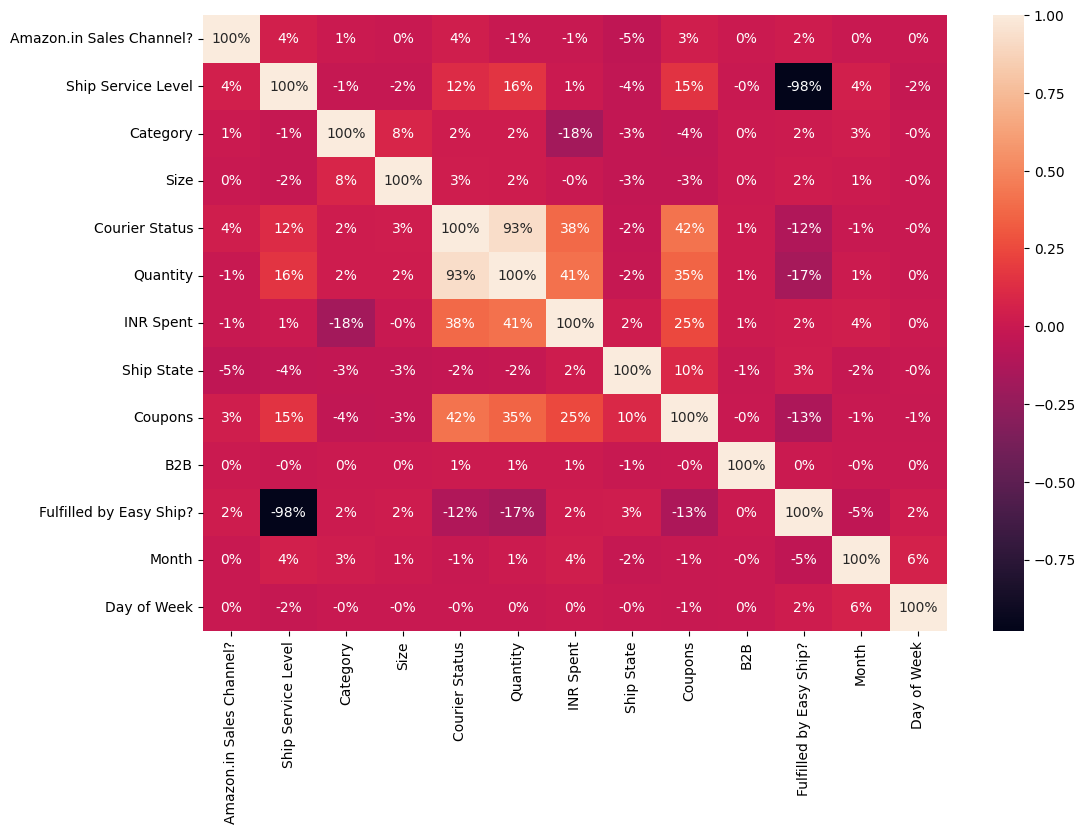

In [376]:
# Correlation Data
corr_data = visualizatoin_data.drop(['Date', 'Style', 'Ship City', 'Ship Postal Code'], axis=1)

# Calculating the correlation using 'pearson' method
correlation=corr_data.corr( method='pearson')

# Represent the calculated correlations using a heatmap to ease the understanding of the data
plt.figure(figsize=(12, 8))
sns.heatmap(correlation,annot=True,fmt=".0%")

plt.show()

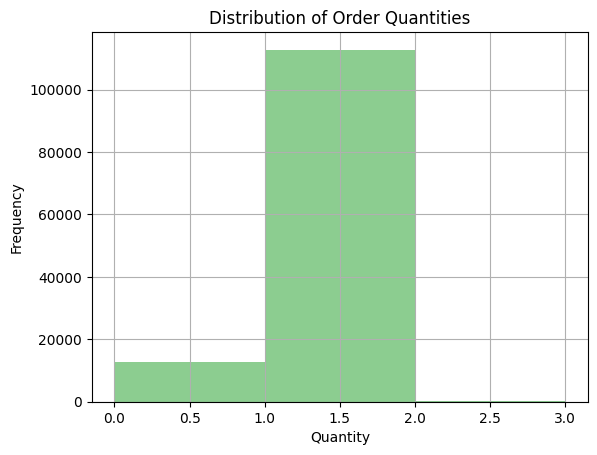

In [377]:
visualizatoin_data['Quantity'].hist(bins=3)  # Adjust bins for better visualization
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Distribution of Order Quantities")
plt.show()

In [378]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125757 entries, 0 to 128976
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date                      125757 non-null  datetime64[ns]
 1   Amazon.in Sales Channel?  125757 non-null  category      
 2   Ship Service Level        125757 non-null  category      
 3   Style                     125757 non-null  category      
 4   Category                  125757 non-null  category      
 5   Size                      125757 non-null  category      
 6   Courier Status            125757 non-null  category      
 7   Quantity                  125757 non-null  int32         
 8   INR Spent                 125757 non-null  float64       
 9   Ship City                 125757 non-null  object        
 10  Ship State                125757 non-null  object        
 11  Ship Postal Code          125757 non-null  category      
 12  Coupons

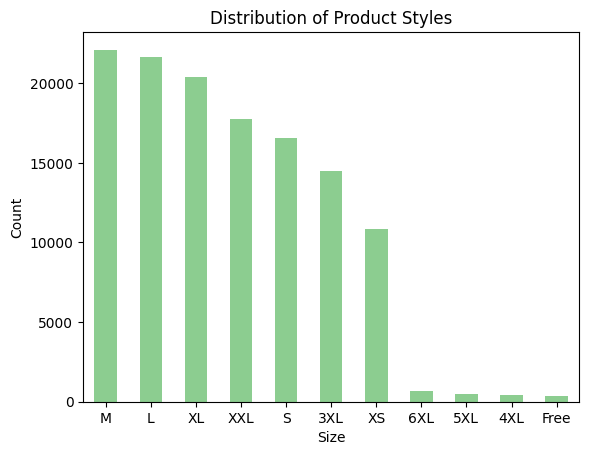

In [379]:
preprocessed_data['Size'].value_counts().plot(kind='bar')
plt.xlabel("Size")
plt.ylabel("Count")
plt.title("Distribution of Product Styles")
plt.xticks(rotation = 0)  # Rotate x-axis labels for better readability if many categories
plt.show()

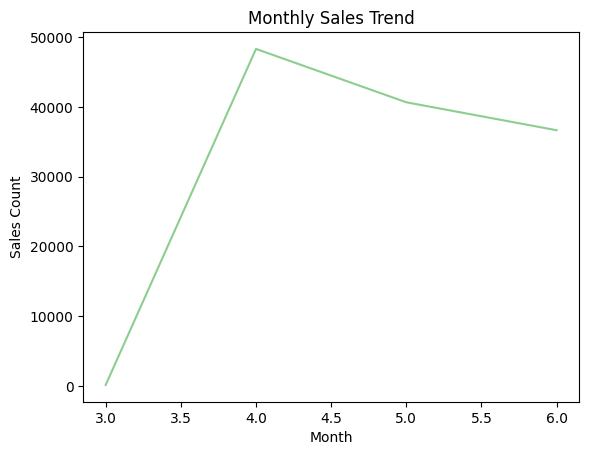

In [380]:
preprocessed_data['Month'].value_counts().sort_index().plot(kind='line')
plt.xlabel("Month")
plt.ylabel("Sales Count")
plt.title("Monthly Sales Trend")
plt.show()

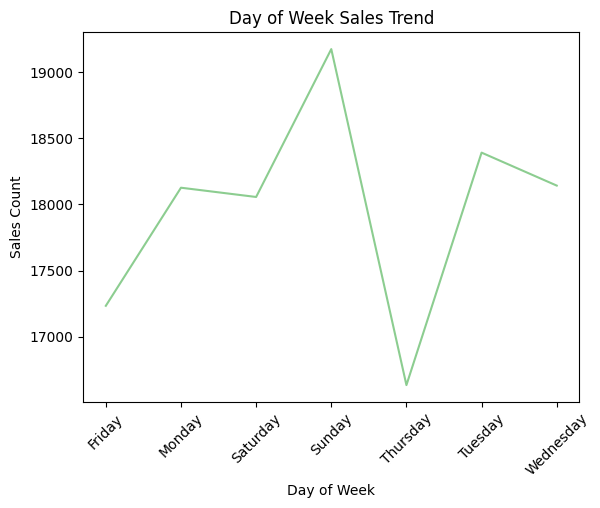

In [381]:
preprocessed_data['Day of Week'].value_counts().sort_index().plot(kind='line')
plt.xlabel("Day of Week")
plt.ylabel("Sales Count")
plt.title("Day of Week Sales Trend")
plt.xticks(rotation = 45)
plt.show()

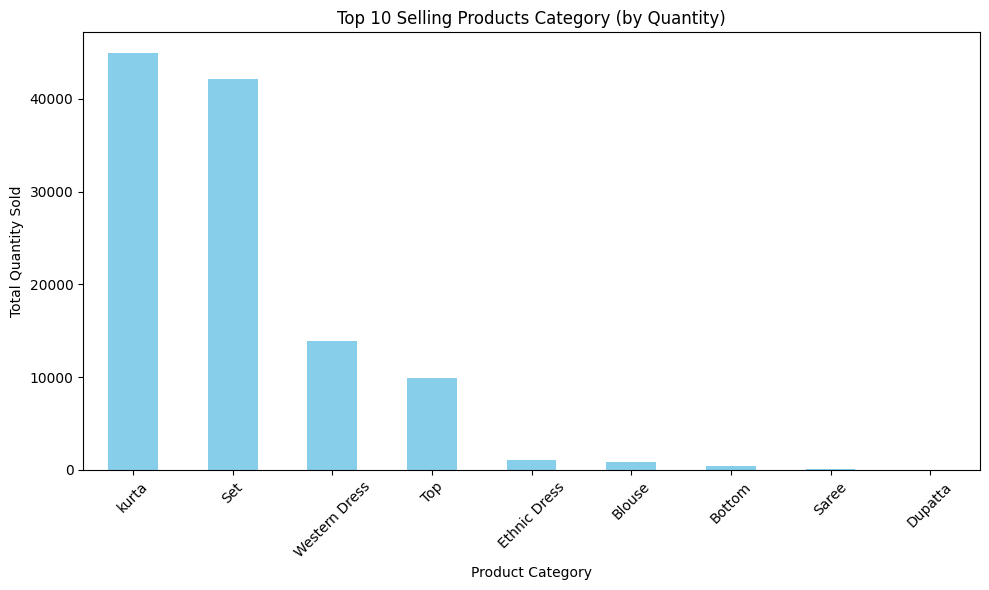

In [382]:
top_products = preprocessed_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
top_products.plot(kind='bar', color='skyblue')
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Selling Products Category (by Quantity)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if many categories
plt.tight_layout()  # Adjust spacing between elements
plt.show()

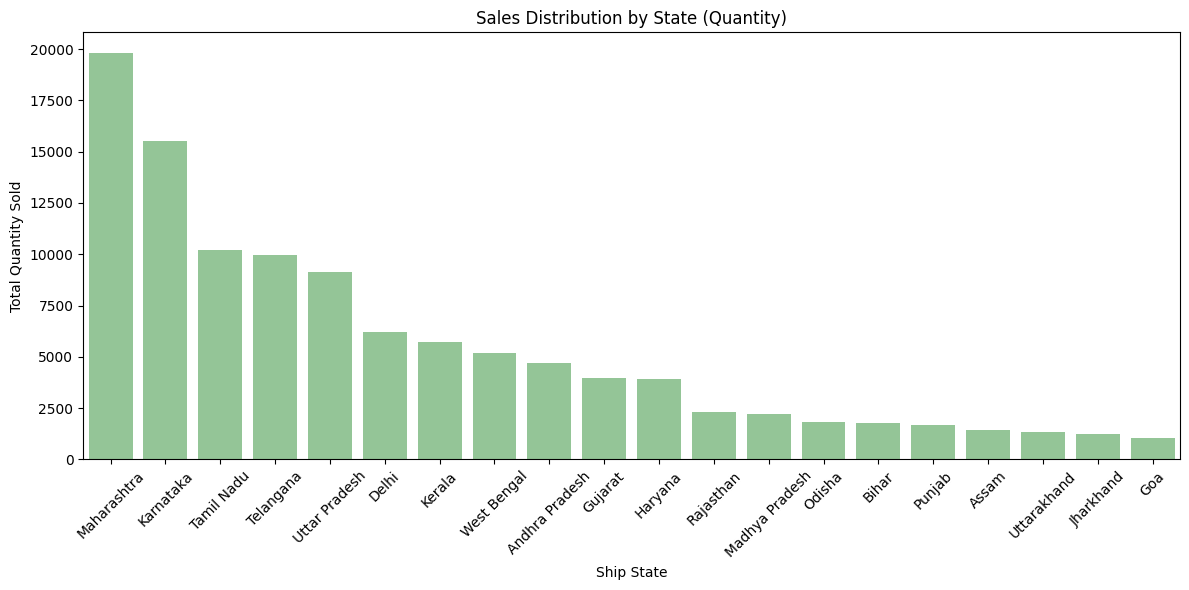

In [383]:
state_sales = preprocessed_data.groupby('Ship State')['Quantity'].sum().sort_values(ascending=False).head(20)

# Create a bar chart
sns.set_palette("Greens_d")
plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.xlabel("Ship State")
plt.ylabel("Total Quantity Sold")
plt.title("Sales Distribution by State (Quantity)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if many categories
plt.tight_layout()
plt.show()

# Predictive Modelling

## 1. Data Scaling